# Classification (Part II)

**Introduction to Python for Data Science** \
Course with Hacktiv8

***

**Sesi 13**

Selasa, 22 Juni 2021 • 19:00 - 22:00 WIB

- Naive Bayes Classifier
- Decision Tree Classifier
- Random Forest
- SVM

***

## Naive Bayes Classifier

Mengasumsikan bahwa efek fitur tertentu dalam kelas tidak bergantung pada fitur lainnya.

Naive Bayes classifier menghitung probabilitas suatu peristiwa dalam langkah-langkah berikut:

> 1. _Calculate the prior probability for given class labels._
> 2. _Find Likelihood probability with each attribute for each class._
> 3. _Put these value in Bayes Formula and calculate posterior probability._
> 4. _See which class has a higher probability, given the input belongs to the higher probability class._

_Import library_ yang akan digunakan:

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

Definisikan dataset menggunakan kumpulan data dummy dengan tiga kolom: `weather`, `temperature`, dan `play`. Dua yang pertama adalah _features_ (`weather`, `temperature`) dan yang lainnya adalah _label_.

In [2]:
weather = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 
'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']

temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

_Encoding_ fitur: Mengubah _string_ menjadi angka, menggunakan LabelEncoder:

In [3]:
le = LabelEncoder()
weather_enc = le.fit_transform(weather)
temp_enc = le.fit_transform(temp)
play_enc = le.fit_transform(play)

print('Weather:', weather_enc)
print('Temp:   ', temp_enc)
print('Play:   ', play_enc)

Weather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp:    [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play:    [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


Mengkombinasikan `weather` dan `temp` menjadi satu _list_ berisikan _tuple_:

In [4]:
label = play_enc
features = list(zip(weather_enc, temp_enc))
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

_Import library_ model Gaussian Naive Bayes, membuat _classifier_, lalu melatih model menggunakan data _training set_, kemudian memprediksi keluaran:

In [5]:
model = GaussianNB()
model.fit(features, label)

prediction = model.predict(features)

print('Target    :', label)
print('Prediction:', prediction)
print('Accuracy score:', model.score(features, label))

Target    : [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Prediction: [0 0 1 1 1 1 1 0 0 1 0 1 1 1]
Accuracy score: 0.7142857142857143


---

_**Multiple labels** with wine dataset_

_Import library_ yang akan digunakan:

In [6]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

Eksplorasi dataset:

In [7]:
wine = load_wine()

print('Features:', wine.feature_names)
print('Labels  :', wine.target_names)
print('Dataset shape:', wine.data.shape)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels  : ['class_0' 'class_1' 'class_2']
Dataset shape: (178, 13)


Menampilkan 5 _records_ teratas:

In [8]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


Menampilkan _label_:

In [9]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Membagi set data menjadi _training set_ dan _test set_:

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    wine.data,
    wine.target,
    test_size=0.3,
    stratify=wine.target,
    random_state=1
)
print(x_train.shape, x_test.shape)

(124, 13) (54, 13)


_Import library_ model Gaussian Naive Bayes, membuat _classifier_, lalu melatih model menggunakan data _training set_, kemudian memprediksi keluaran:

In [11]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

Skor akurasi prediksi:

In [12]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9814814814814815


---

## Decision Tree Classifier

Memiliki struktur menyerupai pohon seperti _flowchart_ di mana _internal node_ mewakili _feature_ atau _attribute_, _branch_ mewakili _decision rule_, dan setiap _leaf node_ mewakili _outcome_. _Node_ paling atas dalam pohon keputusan dikenal sebagai _root node_. _Root node_ belajar untuk mempartisi berdasarkan nilai atribut. _Root node_ mempartisi pohon secara rekursif memanggil partisi rekursif.

Ide dasar di balik _decision tree algorithm_ adalah sebagai berikut:

> 1. _Select the best attribute using Attribute Selection Measures(ASM) to split the records._
> 2. _Make that attribute a decision node and breaks the dataset into smaller subsets._
> 3. _Starts tree building by repeating this process recursively for each child until one of the condition will match:_
>    - _All the tuples belong to the same attribute value._
>    - _There are no more remaining attributes._
>    - _There are no more instances._

_Import_ semua _library_ yang akan digunakan:

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

Menggunakan dataset penyakit diabetes:

In [14]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

diabetes = pd.read_csv('dataset/diabetes.csv', header=0, names=col_names)
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Memisahkan variabel fitur dan target dari dataset:

In [16]:
x = diabetes.drop(columns='label')
y = diabetes['label']

y.value_counts()

0    500
1    268
Name: label, dtype: int64

Membagi dataset menjadi _training set_ dan _test set_:

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

print('Training size:', x_train.shape)
print(y_train.value_counts(), end='\n\n')
print('Test size:', x_test.shape)
print(y_test.value_counts())

Training size: (614, 8)
0    400
1    214
Name: label, dtype: int64

Test size: (154, 8)
0    100
1     54
Name: label, dtype: int64


Membuat objek model _decision tree classifier_, kemudian melakukan _fit_ dan prediksi untuk mendapatkan nilai akurasi modelnya.

In [18]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

print('Training accuracy:', accuracy_score(y_train, train_pred))
print(classification_report(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))

Training accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Test accuracy: 0.7337662337662337
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       100
           1       0.63      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



**Membuat visualisasi pohon keputusan**

Perlu _install_ terlebih dahulu graphviz dan pydotplus:
```py
!pip install python-graphviz pydotplus
```

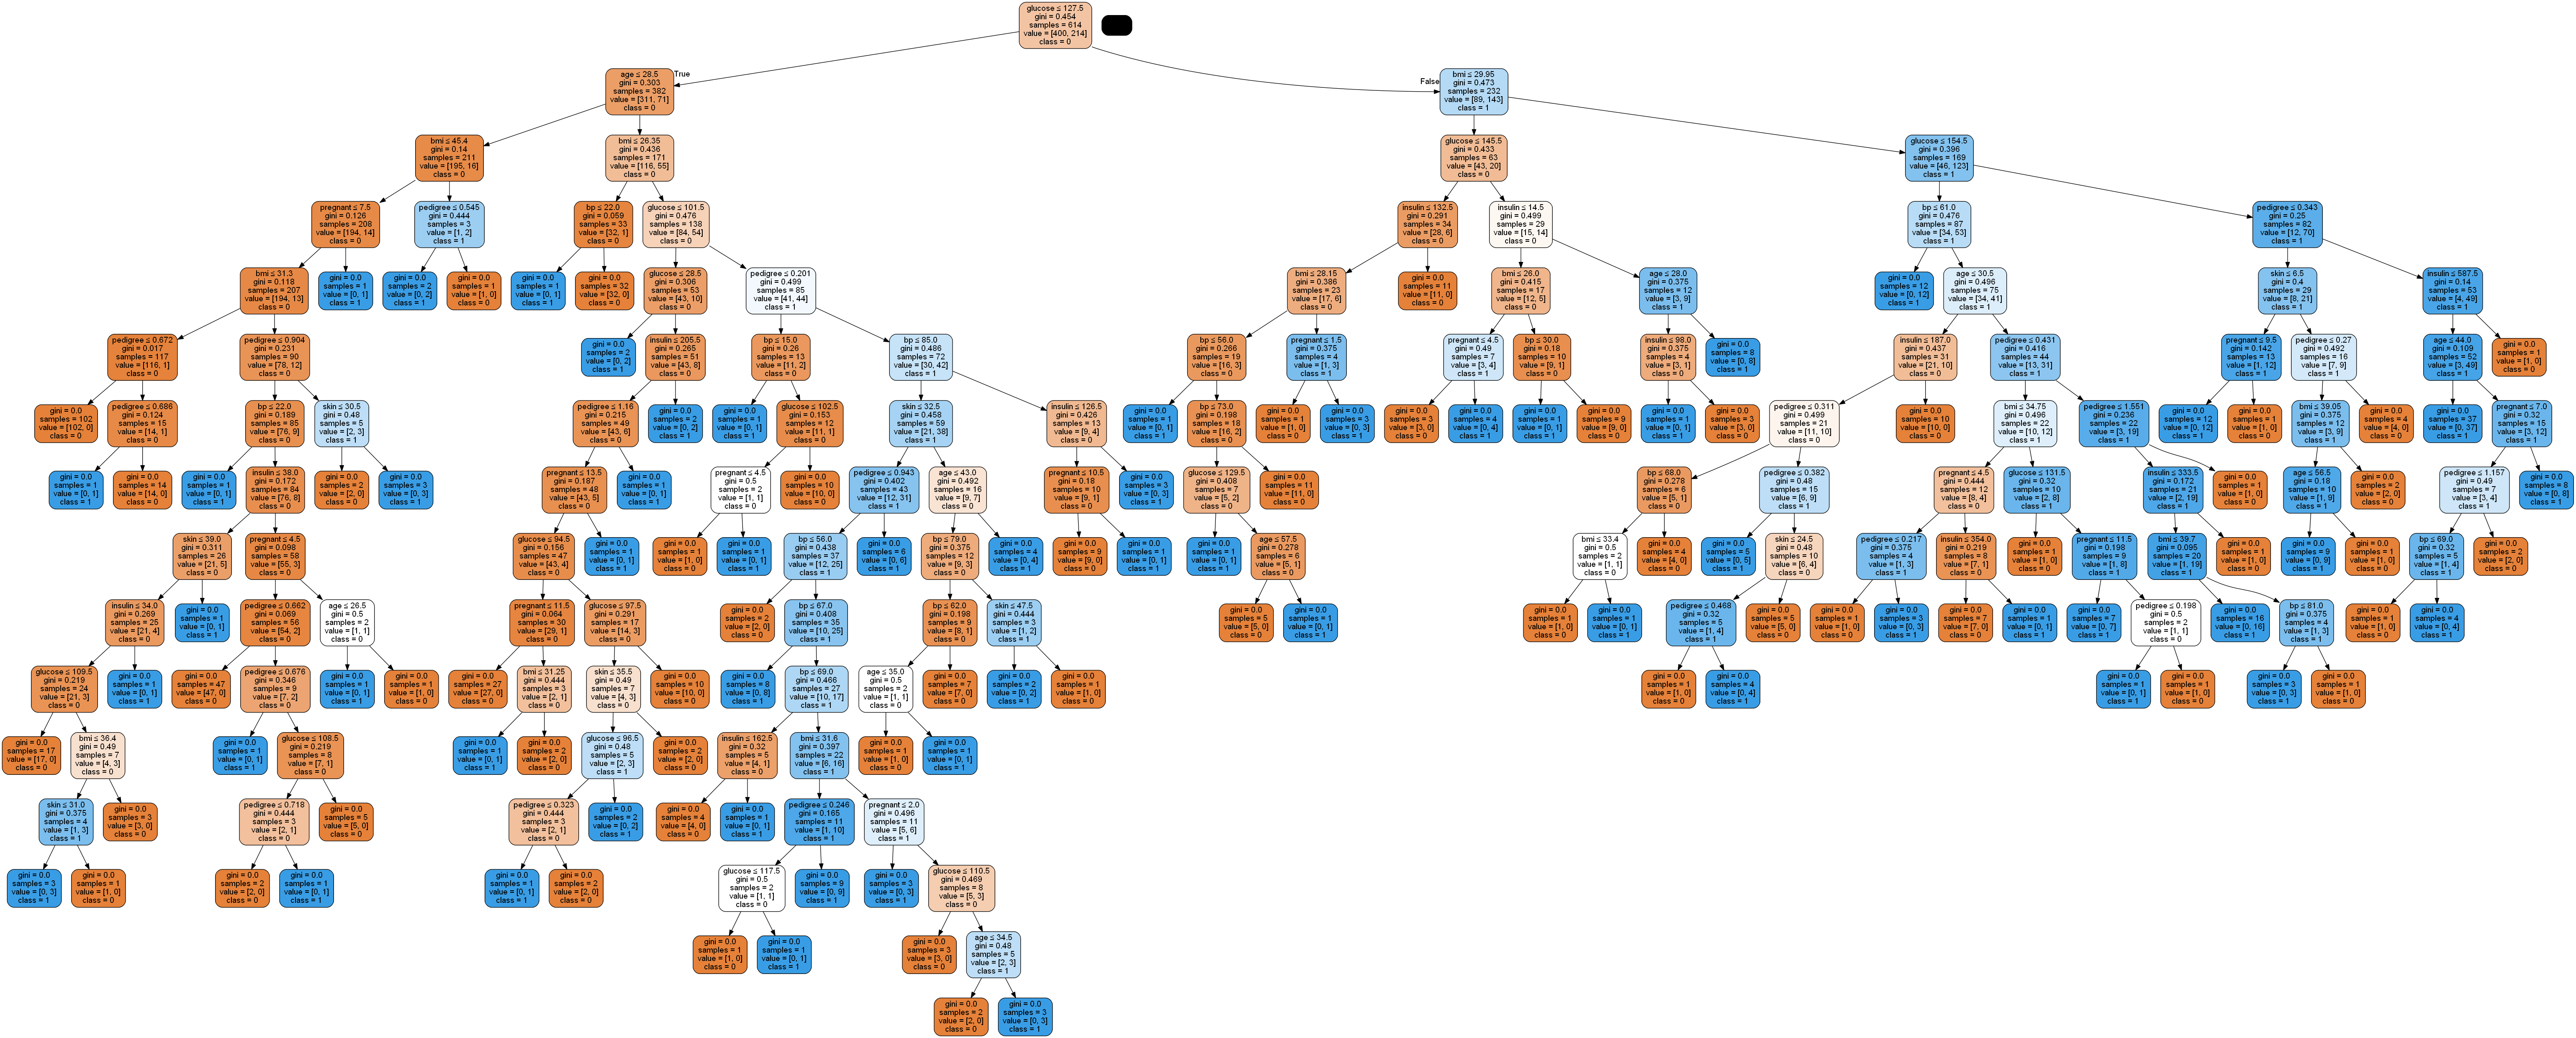

In [19]:
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(
    clf, 
    out_file=dot_data, 
    class_names=['0','1'], # the target names.
    feature_names=x.columns, # the feature names.
    filled=True, # Whether to fill in the boxes with colours.
    rounded=True, # Whether to round the corners of the boxes.
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

**Optimasi performa model** dengan menambahkan beberapa parameter pada objek model:

In [20]:
clf = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=5, 
    min_samples_leaf=10
)
clf.fit(x_train, y_train)

train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

print('Training accuracy:', accuracy_score(y_train, train_pred))
print(classification_report(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))

Training accuracy: 0.8241042345276873
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       400
           1       0.73      0.78      0.75       214

    accuracy                           0.82       614
   macro avg       0.81      0.81      0.81       614
weighted avg       0.83      0.82      0.83       614

Test accuracy: 0.7727272727272727
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       100
           1       0.68      0.67      0.67        54

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



Visualisasi _decision tree_:

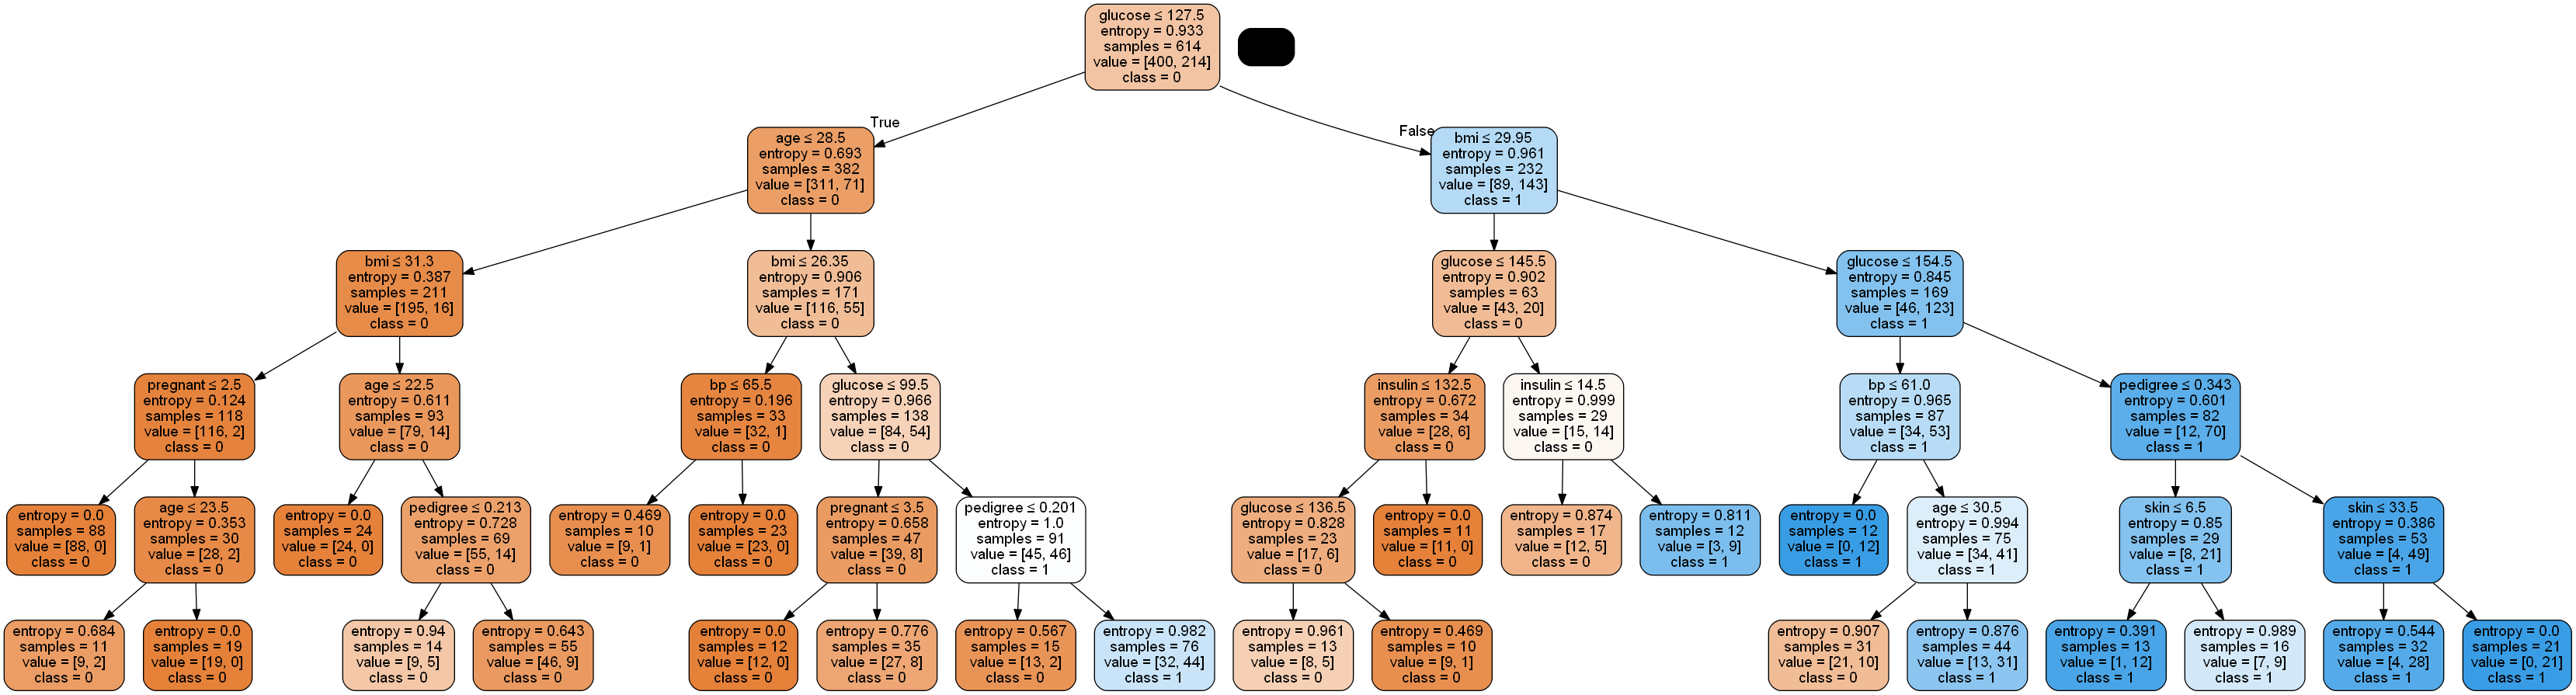

In [21]:
dot_data = StringIO()
tree.export_graphviz(
    clf, 
    out_file=dot_data, 
    class_names=['0','1'], 
    feature_names=x.columns, 
    filled=True, 
    rounded=True, 
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

---

## Random Forest

_Random forest_ bekerja dalam 4 tahap:

> 1. _Select random samples from a given dataset._
> 2. _Construct a decision tree for each sample and get a prediction result from each decision tree._
> 3. _Perform a vote for each predicted result._
> 4. _Select the prediction result with the most votes as the final prediction._

**Random Forests vs Decision Trees**

- _Random forests_ adalah kumpulan dari beberapa _decision trees_.
- _Deep decision trees_ mungkin mengalami _overfitting_, tetapi _random forests_ mencegah _overfitting_ dengan membuat _trees_ pada _random subsets_.
- _Decision trees_ secara komputasi lebih cepat.
- _Random forests_ sulit untuk diinterpretasikan, sedangkan _decision tree_ mudah diinterpretasikan dan dapat diubah menjadi _rules_.

_Import_ semua _library_ yang akan digunakan:

In [22]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

Implementasi menggunakan dataset _iris flower_:

In [23]:
iris = load_iris()

print('Features:', iris.feature_names)
print('Labels  :', iris.target_names)
print('Dataset shape:', iris.data.shape)
print('Top 5 records:\n', iris.data[0:5])
print('Labels:\n', iris.target)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels  : ['setosa' 'versicolor' 'virginica']
Dataset shape: (150, 4)
Top 5 records:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Keterangan label: (0: _setosa_, 1: _versicolor_, 2: _virginica_)

Kemudian buat _dataframe_-nya:

In [24]:
df_iris = pd.DataFrame({
    'sepal_length': iris.data[:, 0], 
    'sepal_width': iris.data[:, 1], 
    'petal_length': iris.data[:, 2], 
    'petal_width': iris.data[:, 3], 
    'species': iris.target 
})
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Pisahkan kolom menjadi variabel dependen dan independen (fitur dan label). Kemudian membagi variabel tersebut menjadi _training_ dan _test set_.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(
    df_iris.drop(columns='species'), 
    df_iris['species'],
    test_size=0.3, 
    random_state=11
)

print('Training size:', x_train.shape)
print(y_train.value_counts(), end='\n\n')
print('Test size:', x_test.shape)
print(y_test.value_counts())

Training size: (105, 4)
1    36
0    36
2    33
Name: species, dtype: int64

Test size: (45, 4)
2    17
1    14
0    14
Name: species, dtype: int64


Melatih model pada set _training_ dan melakukan prediksi pada set _test_. Lalu periksa akurasi menggunakan nilai aktual dan _predicted_:

In [26]:
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=2)
rf_clf.fit(x_train, y_train) 

train_pred = rf_clf.predict(x_train)
test_pred = rf_clf.predict(x_test)

print('Training accuracy:', accuracy_score(y_train, train_pred))
print(classification_report(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))

Training accuracy: 0.9714285714285714
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       0.97      0.94      0.95        33

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

Test accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.87      0.93      0.90        14
           2       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



**Menemukan/memilih fitur penting dalam scikit-learn**

> 1. _Create a random forests model_.
> 2. _Use the feature importance variable to see feature importance scores_.
> 3. _Visualize these scores_.

In [27]:
feature_importances = pd.Series(rf_clf.feature_importances_, index=iris.feature_names)
print(feature_importances)

sepal length (cm)    0.205841
sepal width (cm)     0.035427
petal length (cm)    0.332121
petal width (cm)     0.426611
dtype: float64


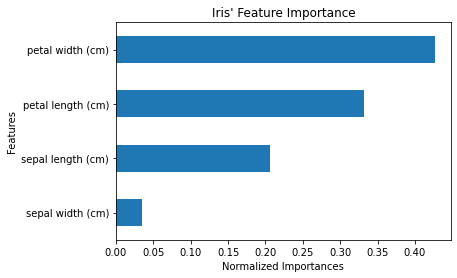

In [28]:
import matplotlib.pyplot as plt

feature_importances.sort_values(ascending=True).plot(kind='barh')
plt.title("Iris' Feature Importance")
plt.xlabel('Normalized Importances')
plt.ylabel('Features')
plt.show()

**_Generating The Model on Selected Values_**

Fitur "sepal width" dan "sepal length" dapat dihapus karena tingkat kepentingannya rendah.

In [29]:
x_train, x_test, y_train, y_test = train_test_split(
    df_iris.drop(columns=['sepal_length', 'sepal_width', 'species']), 
    df_iris['species'],
    test_size=0.3, 
    random_state=11
)

print('Training size:', x_train.shape)
print(y_train.value_counts(), end='\n\n')
print('Test size:', x_test.shape)
print(y_test.value_counts())

Training size: (105, 2)
1    36
0    36
2    33
Name: species, dtype: int64

Test size: (45, 2)
2    17
1    14
0    14
Name: species, dtype: int64


Membuat model pada _training set features_ yang dipilih, melakukan prediksi pada _test set features_ yang dipilih, dan membandingkan nilai aktual dan nilai prediksi.

In [30]:
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=2)
rf_clf.fit(x_train, y_train) 

train_pred = rf_clf.predict(x_train)
test_pred = rf_clf.predict(x_test)

print('Training accuracy:', accuracy_score(y_train, train_pred))
print(classification_report(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))

Training accuracy: 0.9809523809523809
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.97      0.97        36
           2       0.97      0.97      0.97        33

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

Test accuracy: 0.9111111111111111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.86      0.86      0.86        14
           2       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



Setelah menghapus fitur yang paling tidak penting, keakuratannya meningkat. Ini karena menghapus data dan _noise_ yang menyesatkan, sehingga meningkatkan akurasi. Jumlah fitur yang lebih sedikit juga mengurangi _training time_.

---

## SVM (Support Vector Machines)

SVM dapat digunakan di kedua jenis masalah klasifikasi dan regresi serta dapat dengan mudah menangani beberapa variabel kontinu dan kategorikal. Ide inti dari SVM adalah menemukan _maximum marginal hyperplane_ (MMH) yang paling baik membagi dataset menjadi beberapa kelas. _Hyperplane_ adalah _decision plane_ yang memisahkan antara sekumpulan objek yang memiliki kelas yang berbeda. Jarak antara salah satu titik terdekat dikenal sebagai _margin_.

Langkah-langkah:

> - _Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly._
> 
> - _Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure._

Implementasi model SVM menggunakan _cancer_ dataset, yang merupakan _multi-class classification problem_ yang sangat terkenal. Dataset ini dihitung dari gambar digital dari _fine needle aspirate_ (FNA) dari massa payudara. Mereka menggambarkan karakteristik inti sel yang ada dalam gambar.

_Import_ semua _library_ yang akan digunakan:

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score

Eksplorasi data:

In [32]:
cancer = load_breast_cancer()

print('Features:', cancer.feature_names)
print('Labels:', cancer.target_names)
print('Dataset shape:', cancer.data.shape)
print('')
print('Top 5 records of data features:\n', cancer.data[0:5])
print('Targets:\n', cancer.target)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels: ['malignant' 'benign']
Dataset shape: (569, 30)

Top 5 records of data features:
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.

Membagi dataset menjadi _training_ dan _test set_:

In [33]:
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, 
    cancer.target, 
    test_size=0.3, 
    random_state=11
)

print('Training size:', x_train.shape)
print('Test size:    ', x_test.shape)

Training size: (398, 30)
Test size:     (171, 30)


Membuat objek model SVM, kemudian _training_ model dan melakukan prediksi:

In [34]:
svm_cf = svm.SVC(kernel='linear')
svm_cf.fit(x_train, y_train)

train_pred = svm_cf.predict(x_train)
test_pred = svm_cf.predict(x_test)

print('Training accuracy:', accuracy_score(y_train, train_pred))
print(classification_report(y_train, train_pred, target_names=cancer.target_names))
print('Test accuracy:', accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred, target_names=cancer.target_names))

Training accuracy: 0.9723618090452262
              precision    recall  f1-score   support

   malignant       0.97      0.95      0.96       151
      benign       0.97      0.98      0.98       247

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398

Test accuracy: 0.935672514619883
              precision    recall  f1-score   support

   malignant       0.93      0.89      0.91        61
      benign       0.94      0.96      0.95       110

    accuracy                           0.94       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



**Optimasi performa model** dengan menambahkan beberapa parameter pada objek model:

In [35]:
svm_cf = svm.SVC(kernel='linear', C=100)
svm_cf.fit(x_train, y_train)

train_pred = svm_cf.predict(x_train)
test_pred = svm_cf.predict(x_test)

print('Training accuracy:', accuracy_score(y_train, train_pred))
print(classification_report(y_train, train_pred, target_names=cancer.target_names))
print('Test accuracy:', accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred, target_names=cancer.target_names))

Training accuracy: 0.9798994974874372
              precision    recall  f1-score   support

   malignant       0.96      0.99      0.97       151
      benign       0.99      0.98      0.98       247

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398

Test accuracy: 0.9415204678362573
              precision    recall  f1-score   support

   malignant       0.92      0.92      0.92        61
      benign       0.95      0.95      0.95       110

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



---